In [ ]:
region_names = [
"Brigalow_Belt", "Channel_Country", "Central_Queensland_Coast", 
    "Cape_York_Peninsula", "Desert_Uplands", "Einasleigh_Uplands", 
    "Gulf_Plains", "Mitchell_Grass_Downs", "Mulga_Lands", 
    "New_England_Tableland", "Northwest_Highlands", 
    "Southeast_Queensland", "Wet_Tropics"
]

In [15]:
import xarray as xr
import os
import pandas as pd

# Define input and output directories
input_dir = r'Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics'
output_dir = r'Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics'
csv_output_path = 'Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD_csv files'  # Path for the CSV file

file_name = input_dir.split('\\')[-1]  # Get the last part of the input directory path

# Make sure output directory exists
# os.makedirs(output_dir, exist_ok=True)

# Initialize an empty list to collect all the region-wide monthly mean data
all_monthly_data = []

# Loop through each NetCDF file in the folder
for filename in os.listdir(input_dir):
    if filename.endswith('.nc'):
        input_path = os.path.join(input_dir, filename)
        print(f"Processing: {input_path}")

        # Open dataset
        ds = xr.open_dataset(input_path)

        # Get the variable name (e.g., 'max_temp')
        # variable_name = list(ds.data_vars.keys())[0]  # Get the first variable (e.g., max_temp)
        variable_data = ds['vp_deficit']  

        # Convert daily to monthly using mean, sum, etc. (here: mean)
        monthly_data = variable_data.resample(time='1M').mean()

        # Calculate the spatial mean (for the entire region) for each month
        region_mean = monthly_data.mean(dim=['lat', 'lon']).values

        # Create a DataFrame to store monthly region-wide mean data
        # Extract year from filename (if year is part of the filename, otherwise adjust it)
        year = filename.split('_')[0]  # Assuming the filename starts with the year (adjust as necessary)
        
        # Store the region-wide monthly mean data
        for month in range(1, 13):  # Loop through each month (1–12)
            all_monthly_data.append({
                "Year": year,
                "Month": month,
                "Region_Mean": region_mean[month - 1]  # Get the value for that month
            })

        # Save the monthly data to a new .nc file (optional)
        output_path = os.path.join(output_dir, filename.replace('.nc', '.monthly.nc'))
        monthly_data.to_netcdf(output_path)
        print(f"Saved: {output_path}\n")

# Convert the list of region-wide monthly data into a DataFrame and save as CSV
monthly_df = pd.DataFrame(all_monthly_data)
monthly_df.to_csv(os.path.join(csv_output_path, f"{file_name}_monthly_mean_spi.csv"), index=False)

print(f"✅ All region-wide monthly data saved to CSV at: {csv_output_path}")


<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_3204\2825387699.py:8: SyntaxWarning: invalid escape sequence '\D'
  csv_output_path = 'Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD_csv files'  # Path for the CSV file
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarr

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2001.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2001.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2002.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2002.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2003.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2003.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2004.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2004.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: 

c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be r

Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2012.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2013.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2013.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2014.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2014.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2015.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2015.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2016.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\

c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be r

Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2019.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2020.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2020.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2021.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2021.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2022.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\Data for SPI\Vapour Pressure Deficit\VPD Monthly\Wet_Tropics\2022.vp_deficit_Wet_Tropics_qld.monthly.nc

Processing: Data\Data for SPI\Vapour Pressure Deficit\Region Separated Monthly VPD\Wet_Tropics\2023.vp_deficit_Wet_Tropics_qld.nc
Saved: Data\

c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\Jspch\OneDrive\Desktop\ConDrought Implementation\Implementation CD Version 05\venv-cd5\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be r

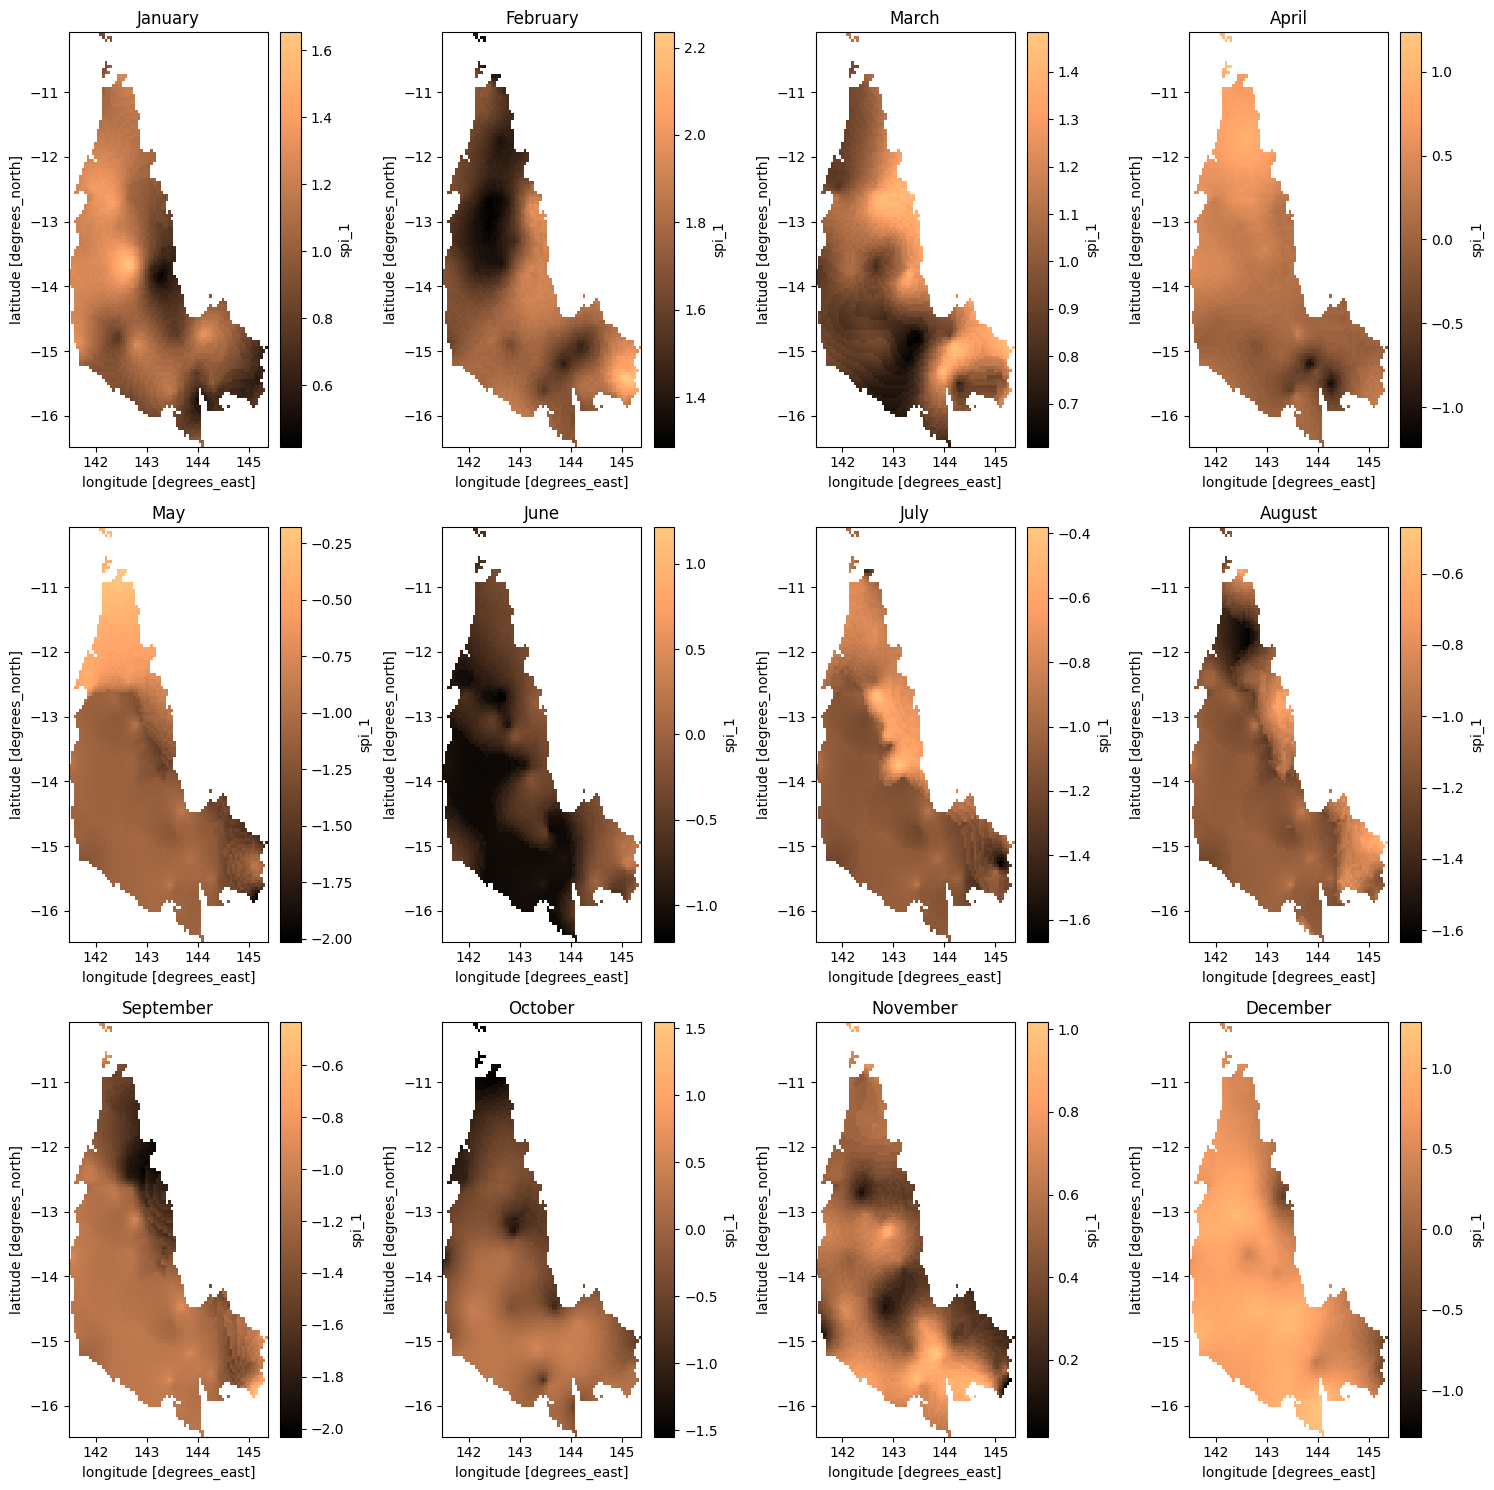

In [22]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(r'Data\Data for SPI\Region wise SPI\Cape_York_Peninsula\2001_spi.nc')
monthly_rain = ds['spi_1']

# Create a figure and axes for the plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))  # Adjust figure size as needed

# Iterate through each month and plot its radiation map
for i, month in enumerate(monthly_rain.time):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    monthly_rain.sel(time=month).plot(ax=ax, cmap='copper') # You can change the colormap
    ax.set_title(month.dt.strftime('%B').item())  # Set month name as title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [8]:
ds = xr.open_dataset(r'Data\Data for SPI\Region wise SPI\Cape_York_Peninsula\2001_spi.nc')
print(ds)

<xarray.Dataset> Size: 960kB
Dimensions:  (time: 12, lat: 128, lon: 78)
Coordinates:
  * time     (time) datetime64[ns] 96B 2001-01-16T12:00:00 ... 2001-12-16T12:...
  * lat      (lat) float64 1kB -16.45 -16.4 -16.35 -16.3 ... -10.2 -10.15 -10.1
  * lon      (lon) float64 624B 141.5 141.6 141.6 141.7 ... 145.2 145.3 145.3
Data variables:
    spi_1    (time, lat, lon) float64 958kB ...
